<h1>Lab 4 | Customer Analysis Round 2</h1>

In [1]:
import pandas as pd  
import numpy as np

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [4]:
# Show the dataframe shape

In [5]:
data_shape = data.shape
print(data_shape)

(9134, 24)


In [6]:
# Standardize header names

In [7]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols

data.columns

#cols = []
#for colname in data.columns:
#    cols.append(colname.lower())
#
#data.columns = cols

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [9]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
data = data.rename(columns={"employmentstatus": "employment status"})

In [11]:
# Which columns are numerical?
# Which columns are categorical?

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [13]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [14]:
numerical_columns = data.select_dtypes(include=['float64']).columns
numerical_columns

Index(['customer lifetime value', 'total claim amount'], dtype='object')

In [15]:
# Check and deal with NaN values.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [17]:
# We can see that columns: ['state', 'response', 'months since last claim', 'number of open complaints',
# 'vehicle class', 'vehicle size', 'vehicle type'] are having less values that there are rows in the Dataset,
# so there are NaN values there.

In [18]:
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [19]:
data = data.drop_duplicates()

In [20]:
# data_cleaned[data_cleaned['state'].isna()].head()

In [21]:
#nan_rows = data.isna().any(axis = 1)
#nan_rows

In [22]:
#data_cleaned = data.loc[~nan_rows]
#data_cleaned.isna().sum()

In [23]:
# Let's explore what do we have in each of these columns

In [24]:
data['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

<AxesSubplot:>

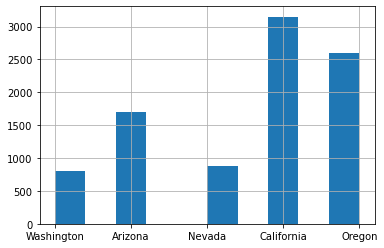

In [25]:
data['state'].hist()

In [26]:
data_cleaned = data[data['state'].isna()==False]
data_cleaned.shape

(9134, 24)

In [27]:
data['response'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:>

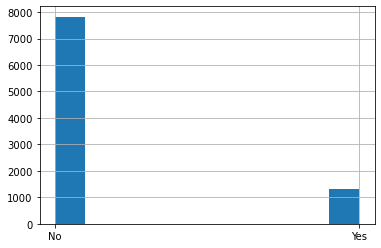

In [28]:
data['response'].hist()

In [29]:
data_cleaned = data_cleaned[data_cleaned['response'].isna()==False]
data_cleaned.shape

(9134, 24)

In [30]:
data_cleaned.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [31]:
data_cleaned['months since last claim'].unique()

array([32, 13, 18, 12, 14,  0, 17, 23, 27,  9, 21, 11, 31,  8,  4, 30, 22,
       15, 33,  1, 19, 28, 10,  7,  3,  5, 20, 24, 29, 34,  6, 35,  2, 16,
       26, 25])

<AxesSubplot:>

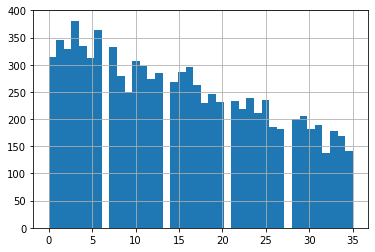

In [32]:
data_cleaned['months since last claim'].hist(bins = 40)

In [33]:
mean_months_since_last_claim = data_cleaned['months since last claim'].mean()

data_cleaned['months since last claim'] = data_cleaned['months since last claim'].fillna(mean_months_since_last_claim)

In [34]:
data_cleaned.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [35]:
data_cleaned['number of open complaints'].unique()

array([0, 2, 1, 3, 5, 4])

<AxesSubplot:>

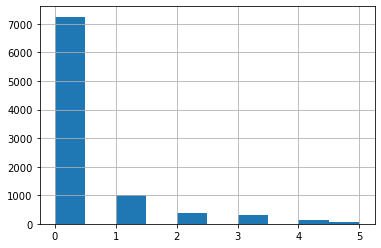

In [36]:
data_cleaned['number of open complaints'].hist()

In [37]:
median_number_of_open_complaints = data_cleaned['number of open complaints'].median()

data_cleaned['number of open complaints'] = data_cleaned['number of open complaints'].fillna(median_number_of_open_complaints)

In [38]:
data_cleaned.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [39]:
data_cleaned['vehicle class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

<AxesSubplot:>

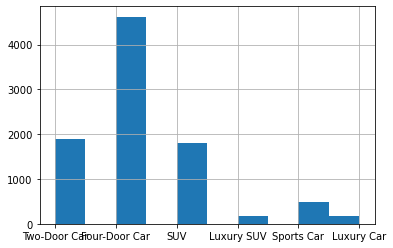

In [40]:
data_cleaned['vehicle class'].hist()

In [41]:
data_cleaned['vehicle class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle class, dtype: int64

In [42]:
most_popular_vehicle_class = 'Four-Door Car'

data_cleaned['vehicle class'] = data_cleaned['vehicle class'].fillna(most_popular_vehicle_class)


In [43]:
data_cleaned.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [44]:
data_cleaned['vehicle size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

<AxesSubplot:>

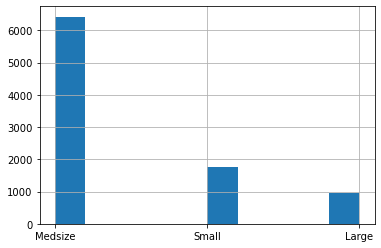

In [45]:
data_cleaned['vehicle size'].hist()

In [46]:
data_cleaned['vehicle size'] = data_cleaned['vehicle size'].fillna('Medsize')

In [47]:
# Datetime format - Extract the months from the dataset and store in a separate column.
# Then filter the data to show only the information for the first quarter ,
# ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [48]:
data_cleaned['effective to date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [49]:
data_cleaned['effective to date'].dtype

dtype('O')

In [50]:
data_cleaned['effective to date'] = pd.to_datetime(data_cleaned['effective to date'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employment status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [51]:
data_cleaned['month'] = pd.DatetimeIndex(data_cleaned['effective to date']).month
data_cleaned.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [52]:
data_cleaned['month'].unique()

array([2, 1])

In [53]:
# So this column contains only January and February

In [54]:
# BONUS: Put all the previously mentioned data transformations into a function.

# Not sure I'm ready to do it :) 

<h1>Lab 5 | Customer Analysis Round 3</h1>

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [55]:
# Describe DataFrame

data_cleaned.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [56]:
# Show a plot of the total number of responses

data_cleaned['response'].unique

<bound method Series.unique of 0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: response, Length: 9134, dtype: object>

In [57]:
data_cleaned[data_cleaned['response'] =='Yes'].shape[0]


1308

In [58]:
import matplotlib.pyplot as plt


<AxesSubplot:>

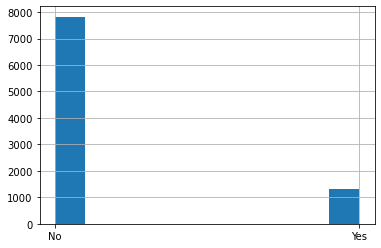

In [59]:
data_cleaned['response'].hist()

In [60]:
# Show a plot of the response rate by the sales channel

data_cleaned.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [61]:
data_cleaned['sales channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [62]:
data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Agent')]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
22,YH23384,Arizona,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
41,MB98372,Oregon,2771.045031,Yes,Basic,College,2011-01-11,Employed,F,50071,...,0,1,Corporate Auto,Corporate L3,Offer2,Agent,18.918935,Two-Door Car,Medsize,1
42,IL19217,California,3939.006370,Yes,Extended,Bachelor,2011-01-28,Employed,F,60021,...,0,1,Personal Auto,Personal L2,Offer2,Agent,882.871945,Four-Door Car,Small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9029,IP93821,California,3600.934326,Yes,Basic,High School or Below,2011-02-25,Retired,F,25147,...,0,1,Personal Auto,Personal L1,Offer1,Agent,694.598288,SUV,Medsize,2
9101,CX22458,California,9075.768214,Yes,Basic,Master,2011-01-26,Employed,M,37722,...,0,8,Personal Auto,Personal L3,Offer1,Agent,158.077504,Sports Car,Medsize,1
9102,TL44525,California,2619.337376,Yes,Basic,Bachelor,2011-02-05,Employed,M,78618,...,0,1,Corporate Auto,Corporate L1,Offer1,Agent,225.578841,Two-Door Car,Medsize,2
9110,RA89822,California,34611.378960,Yes,Basic,High School or Below,2011-01-14,Employed,F,20090,...,0,2,Personal Auto,Personal L2,Offer2,Agent,523.200000,Sports Car,Medsize,1


In [63]:
number_responses_agent_chanel = data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Agent')].shape[0]
number_responses_agent_chanel

666

In [64]:
agent_chanel = data_cleaned[data_cleaned['sales channel'] == 'Agent'].shape[0]
agent_chanel

3477

In [65]:
response_rate_agent_chanel = (number_responses_agent_chanel / agent_chanel)*100
response_rate_agent_chanel

19.15444348576359

In [66]:
number_responses_call_center = data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Call Center')].shape[0]
number_responses_call_center

192

In [67]:
call_center = data_cleaned[data_cleaned['sales channel'] == 'Call Center'].shape[0]
call_center

1765

In [68]:
response_rate_call_center = (number_responses_call_center / call_center)*100
response_rate_call_center

10.878186968838527

In [69]:
number_responses_web = data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Web')].shape[0]
number_responses_web

156

In [70]:
web = data_cleaned[data_cleaned['sales channel'] == 'Web'].shape[0]
web

1325

In [71]:
response_rate_web = (number_responses_web / web)*100
response_rate_web

11.773584905660377

In [72]:
number_responses_branch = data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Branch')].shape[0]
number_responses_branch

294

In [73]:
sales_channels = []
for label in data_cleaned['sales channel'].unique():
   sales_channels.append((data_cleaned[data_cleaned['sales channel'] == label]['response'] == 'Yes').mean() * 100)
print(sales_channels)

[19.15444348576359, 10.878186968838527, 11.773584905660377, 11.453058044409817]


In [74]:
branch = data_cleaned[data_cleaned['sales channel'] == 'Branch'].shape[0]
branch

2567

In [75]:
response_rate_branch = (number_responses_branch / branch)*100
response_rate_branch

11.453058044409817

In [76]:
responses = [response_rate_agent_chanel, response_rate_call_center, response_rate_web, response_rate_branch]
responses

[19.15444348576359, 10.878186968838527, 11.773584905660377, 11.453058044409817]

In [77]:
list(data_cleaned['sales channel'].unique())

['Agent', 'Call Center', 'Web', 'Branch']

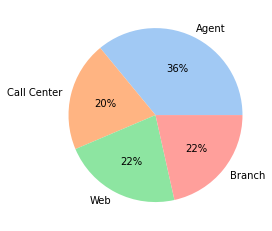

In [78]:
import seaborn as sns

#define data
data = responses
labels = list(data_cleaned['sales channel'].unique())

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

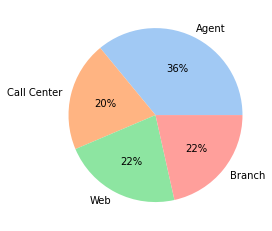

In [79]:
# We can also use sales_channels to do the same

import seaborn as sns

#define data
data = sales_channels
labels = list(data_cleaned['sales channel'].unique())

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()




In [80]:
# Or we can use groupby

In [81]:
data_cleaned['response']

0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: response, Length: 9134, dtype: object

In [82]:
data_cleaned['response_bool'] = data_cleaned['response'] == 'Yes'
data_grouped = data_cleaned.groupby('sales channel')['response_bool'].mean()

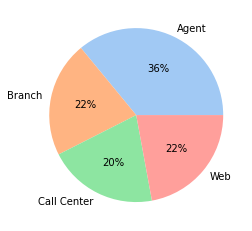

In [83]:
# We can also use sales_channels to do the same

import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data_grouped, labels = data_grouped.index, colors = colors, autopct='%.0f%%')
plt.show()


In [84]:
type(data_grouped)

pandas.core.series.Series

In [85]:
# Show a plot of the response rate by the total claim amount

In [86]:
data_grouped[0]

0.1915444348576359

In [87]:
data_cleaned['total claim amount'].unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [88]:
data_grouped_total_claim_amount = data_cleaned.groupby('total claim amount')['response_bool'].mean()
data_grouped_total_claim_amount

total claim amount
0.099007       0.0
0.382107       0.0
0.423310       0.0
0.517753       0.0
0.769185       0.0
              ... 
2345.413441    0.0
2452.894264    0.0
2552.343856    0.0
2759.794354    0.0
2893.239678    0.0
Name: response_bool, Length: 5106, dtype: float64

response
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total claim amount, dtype: object

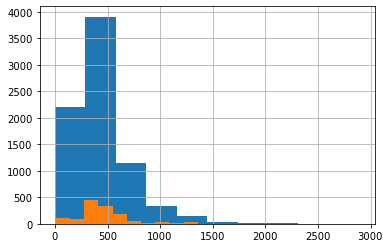

In [89]:
data_cleaned.groupby('response')['total claim amount'].hist()

<AxesSubplot:xlabel='total claim amount', ylabel='Count'>

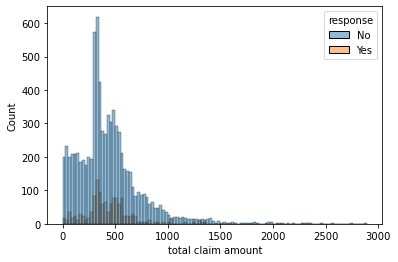

In [90]:
sns.histplot(data=data_cleaned, x='total claim amount', hue='response')

In [91]:
# Show a plot of the response rate by income

response
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: income, dtype: object

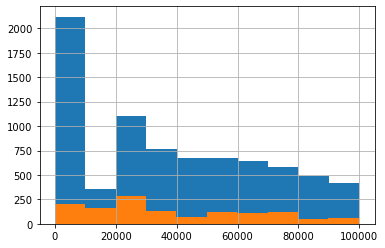

In [92]:
data_cleaned.groupby('response')['income'].hist()

<AxesSubplot:xlabel='income', ylabel='Count'>

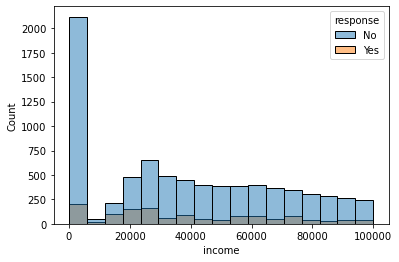

In [93]:
sns.histplot(data=data_cleaned, x='income', hue='response')

<h1>Lab 6 | Customer Analysis Round 4</h1>

Check the data types of the columns. Get the numeric data into dataframe called 'numerical' and categorical columns in a dataframe called 'categoricals'. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [94]:
# Check the data types of the columns.
data_cleaned.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [95]:
# Numerical and categorical columns

numerical_columns = data_cleaned.select_dtypes(include=['float64']).columns
display(numerical_columns)

categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
display(categorical_columns)

Index(['customer lifetime value', 'total claim amount'], dtype='object')

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employment status', 'gender', 'location code', 'marital status',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [96]:
# np.number
numerical = data_cleaned.select_dtypes(np.number)
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,2
9131,8163.890428,0,85,9,37,3,2,790.784983,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,2


In [97]:
# np.object
categorical = data_cleaned.select_dtypes(np.object)
categorical

/var/folders/_x/417nh66n2m9gh2skyd2l26340000gn/T/ipykernel_41386/2180324508.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = data_cleaned.select_dtypes(np.object)


,customer,state,response,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution

In [98]:
# 1.Use seaborn library to construct distribution plots for the numerical variables

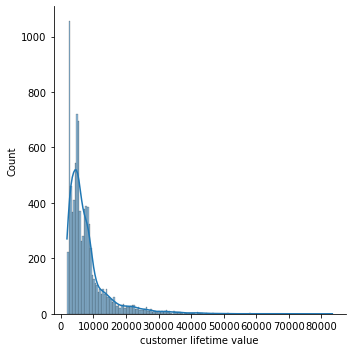

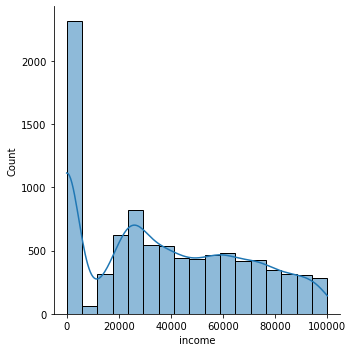

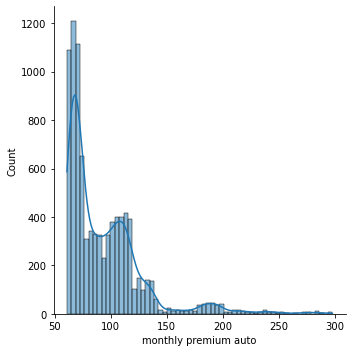

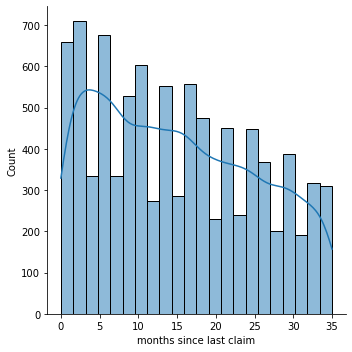

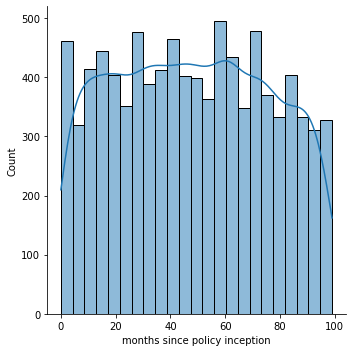

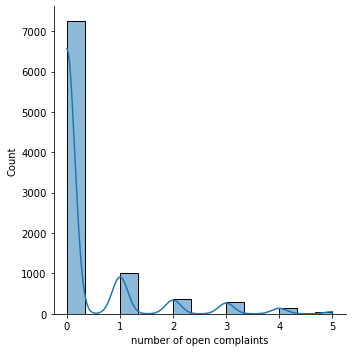

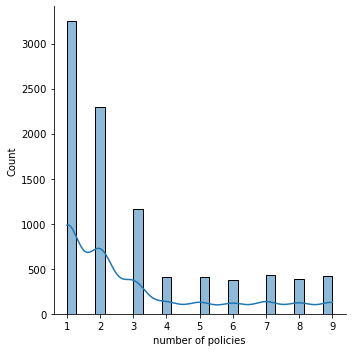

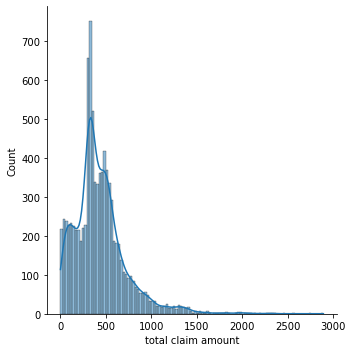

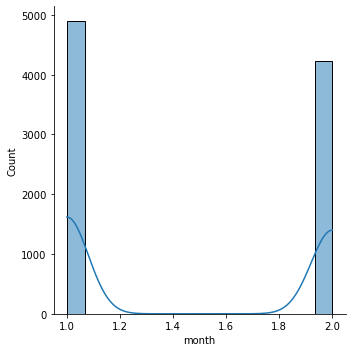

In [99]:
# fig, ax = plt.subplots(2, 1)
for column_name in numerical.columns:
    sns.displot(numerical[column_name], kde=True)

# sns.displot(numerical, x='Customer Lifetime Value', kde=True)
# sns.displot(numerical, x='Monthly Premium Auto', kde=True)
# sns.displot(numerical, x='Months Since Last Claim', kde=True)
# sns.displot(numerical, x='Months Since Policy Inception', kde=True)

In [100]:
# 2. Use Matplotlib to construct histograms

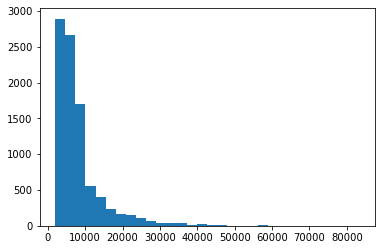

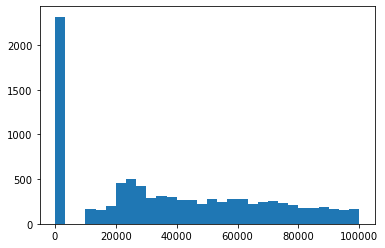

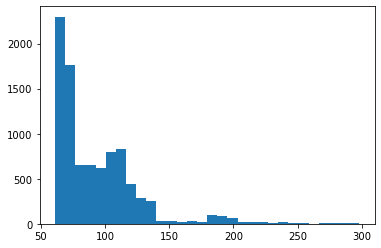

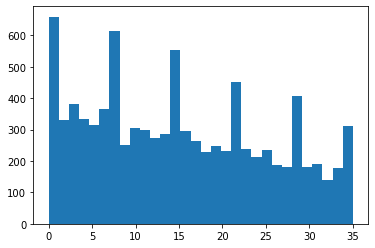

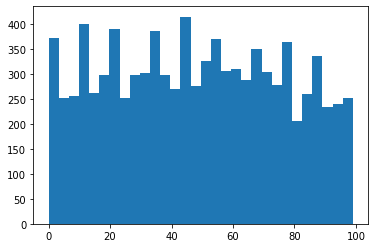

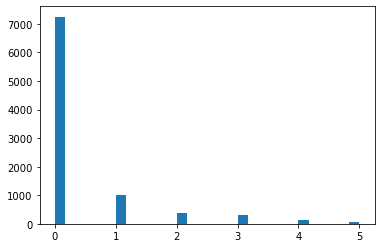

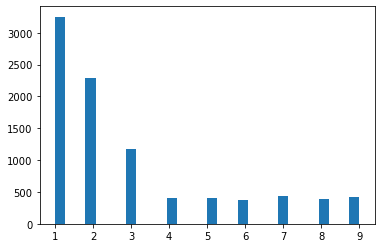

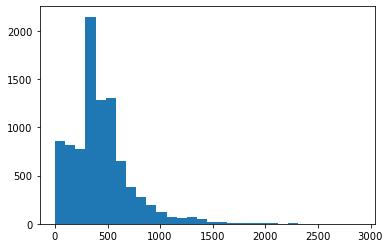

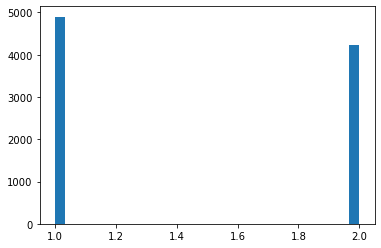

In [101]:
for column_name in numerical.columns:
    plt.hist(numerical[column_name], bins=30)
    plt.show()

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [102]:
numerical.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

<AxesSubplot:>

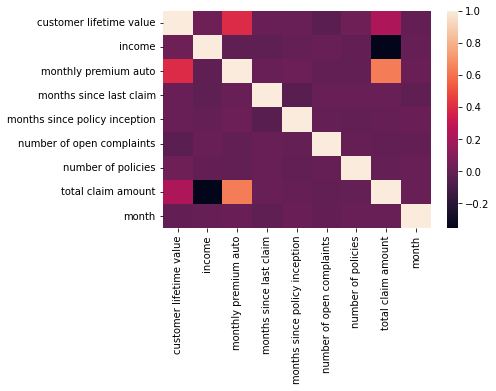

In [103]:
sns.heatmap(numerical.corr())

In [104]:
# I don't have any columns which are showing high correlation (greater than 0.9),
# so I don't need to drop any columns here.

<h1>Customer Analysis Round 5</h1>

1. X-y split.
2. Normalize (numerical).

In [105]:
data_cleaned.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'month', 'response_bool'],
      dtype='object')

In [106]:
# X-y split

y = data_cleaned['total claim amount']
X = data_cleaned.drop(['total claim amount'], axis=1)


print(X.shape)
print(y.shape)

(9134, 25)
(9134,)


In [107]:
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(object)

In [108]:
# Normalizing numerical columns using the MinMaxScaler
# This will scale all within a range from 0.0 to 1.0.

from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_num)

X_normalized = minMaxScaler.transform(X_num)
X_normalized_data = pd.DataFrame(X_normalized, columns=X_num.columns)

display(X_normalized)
print(X_normalized.shape)
display(X_normalized_data)

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.        , 0.        ,
        1.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.        , 0.875     ,
        0.        ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.        , 0.125     ,
        1.        ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.6       , 0.125     ,
        1.        ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.        , 0.25      ,
        1.        ],
       [0.00876645, 0.        , 0.06751055, ..., 0.        , 0.        ,
        1.        ]])

(9134, 8)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1.0


In [109]:
X_normalized_data.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


In [110]:
from sklearn.preprocessing import StandardScaler


# using standard scaler: making data distributed with mean=0 and std=1
stdScaler = StandardScaler()
stdScaler.fit(X_num)
X_standardized = stdScaler.transform(X_num)

print(X_standardized.shape)
pd.DataFrame(X_standardized, columns=X_num.columns)

(9134, 8)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,1.075304
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,-0.929969
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,1.075304
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,-0.929969
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,1.075304
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,1.075304
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,1.075304
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.075304
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,1.075304


In [111]:
# The mean = 0 and the standard deviation = 1.

print(f"Mean: {round(X_standardized.mean())}")
print(f"Standard Deviation: {round(X_standardized.std())}")

Mean: 0
Standard Deviation: 1


<h1>Customer Analysis Round 6</h1>

Processing Data

- X-y split. (done)
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

Linear Regression
- Train-test split.
- Apply linear regression.
- Model Validation

Description:
- R2.
- MSE.
- RMSE.
- MAE.

In [112]:
# Deliting columns: 'customer' (we can't change it to numerical)

X_cat_to_encode = X_cat.drop(['customer'], axis=1)
X_cat_to_encode.columns.tolist()

['state',
 'response',
 'coverage',
 'education',
 'employment status',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size']

In [113]:
# OneHot Encoding - converting categorial columns into multiple numerical columns

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_cat_to_encode) # This determines how many unique values has each categorical column

print(encoder.categories_)
encoded = encoder.transform(X_cat_to_encode).toarray()
#print(encoded)

#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded_data = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
onehot_encoded_data.head()

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
# Concatenating normalized numerical columns with one-hot-encoded columns


X = pd.concat([X_normalized_data, onehot_encoded_data], axis=1)

print(f'Old number of columns = {len(data_cleaned.columns.tolist())}')
print(f'New number of columns = {len(X.columns.tolist())}')

Old number of columns = 26
New number of columns = 65


In [116]:
# Apply train/test split
# Here we use 20% of the data for testing and RNG-seed = 42

from sklearn.model_selection import train_test_split

# Split X,y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')

X_train: (7307, 65)
X_test:  (1827, 65)
y_train: (7307,)
y_test:  (1827,)


In [117]:
# Apply linear regression, train/fit the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [118]:
# Model Validation

from sklearn.metrics import r2_score

# Predict training set
y_pred_train = lm.predict(X_train)
print(f"y_pred_train = {y_pred_train}")

# R2 score for training set
r2_train = r2_score(y_train, y_pred_train)
print(f"r2_train = {r2_train}")

y_pred_train = [190. 579. 406. ... 815. 759. 296.]
r2_train = 0.7742094339869412


In [119]:
# Predict test set
y_pred_test  = lm.predict(X_test)
print(f"y_pred_test = {y_pred_test}")

# R2 score for test set
r2_test = r2_score(y_test, y_pred_test)
print(f"r2_test = {r2_test}")

y_pred_test = [187. 462. 453. ... 201. 520. 650.]
r2_test = 0.7625386431974048


In [120]:
from sklearn.metrics import mean_squared_error

# MSE - Mean Squared Error
mse = mean_squared_error(y_test,y_pred_test)
mse

18880.799621685088

In [121]:
# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

137.4074220036352

In [122]:
from sklearn.metrics import mean_absolute_error

# MAE - Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
mae

94.549150136289